In [1]:
import csv
import pandas as pd

# Specify the path to your CSV file using forward slashes
csv_file_path = 'C:/Users/ACER/Desktop/ders notları/2-2/CS210/project/df_real.csv'

# Reading data from CSV file into a DataFrame
with open(csv_file_path, 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)

    # Convert the CSV data to a list of lists
    data = list(csv_reader)

# Convert the list of lists to a DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Display the DataFrame
display(df.head())
df.info()

,Watched Date,Film Name,Film Year,My Rating,General Rating,Director,Genres,Month
0,2023-12-25,In Bruges,2008,,4.1,Martin McDonagh,"['Drama', 'Comedy', 'Crime']",2023-12
1,2023-12-25,The Nightmare Before Christmas,1993,3.5,3.9,Henry Selick,"['Family', 'Animation', 'Fantasy']",2023-12
2,2023-12-16,The Matrix,1999,5.0,4.2,Lilly Wachowski,"['Science Fiction', 'Action']",2023-12
3,2023-12-11,The Hunger Games,2012,,3.6,Gary Ross,"['Fantasy', 'Science Fiction', 'Adventure']",2023-12
4,2023-12-10,The Hunger Games: The Ballad of Songbirds & Sn...,2023,3.5,3.6,Francis Lawrence,"['Science Fiction', 'Drama', 'Action']",2023-12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Watched Date    108 non-null    object
 1   Film Name       108 non-null    object
 2   Film Year       108 non-null    object
 3   My Rating       108 non-null    object
 4   General Rating  108 non-null    object
 5   Director        108 non-null    object
 6   Genres          108 non-null    object
 7   Month           108 non-null    object
dtypes: object(8)
memory usage: 6.9+ KB


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px 
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go
from matplotlib.patches import FancyBboxPatch
from matplotlib.patches import Rectangle

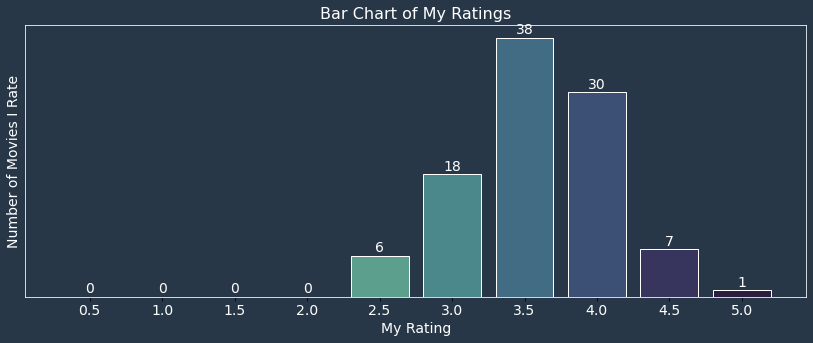

In [3]:
# Convert numeric format
df['My Rating'] = pd.to_numeric(df['My Rating'], errors='coerce')

# Specify the edges of the bins to get exactly 10 bars
bins = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Create a DataFrame with all possible rating values from 0.5 to 5
all_ratings = pd.DataFrame({'My Rating': [round(val, 1) for val in bins]})

# Get counts for each rating value
counts = df['My Rating'].dropna().value_counts().sort_index()

# Merge all_ratings with counts
result = pd.merge(all_ratings, counts, how='left', left_on='My Rating', right_index=True)

# Fill NaN values with 0
result['My Rating_y'] = result['My Rating_y'].fillna(0).astype(int)

# Rename the columns for clarity
result.columns = ['My Rating', 'Count']

# Extract the 'Count' column from the result DataFrame
counts_list = result['Count'].tolist()

# Set the size of the figure (width, height)
fig = plt.figure(figsize=(14, 5))

# Set the background color for the entire plot
fig.patch.set_facecolor('#283747')  # Dark background color
ax = plt.axes()
ax.set_facecolor("#283747")
# Set the borders of the chart to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

positions = range(len(counts_list))

# Use Seaborn's 'mako' color palette for a dark-to-light transition
colors = sns.color_palette("ch:start=.5, rot=-.75", n_colors=len(positions))
bars = plt.bar(positions, counts_list, capstyle='round', linewidth=1.0, color=colors, edgecolor='white')

plt.xticks(positions, bins, fontsize=14, color='white')

# Remove the grid
plt.grid(False)

# Remove Y labels
plt.yticks([])

# Show rounded values above bars
for index, value in enumerate(counts_list):
    plt.text(index, value + 0.1, str(round(value)), ha='center', va='bottom', color='white', fontsize=14)  # Set text color to white and round the value

# Add x, y labels, and title
plt.xlabel('My Rating', fontsize=14, color='white')
plt.ylabel('Number of Movies I Rate', fontsize=14, color='white')
plt.title('Bar Chart of My Ratings', fontsize=16, color='white')

plt.show()


'Drama'       70
'Comedy'      32
'Thriller'    27
'Crime'       23
'Mystery'     17
'Horror'      16
'Romance'     13
'Fantasy'     11
'Action'      10
'History'     10
Name: Genre, dtype: int64


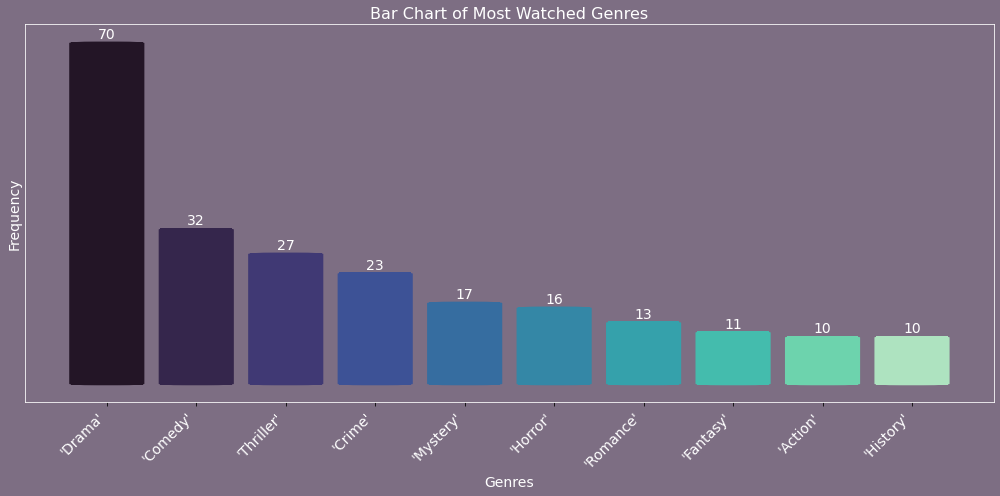

In [4]:

# 'Genres' column contains lists,convert them to strings
df['Genres'] = df['Genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Remove square brackets from the 'Genres' column
df['Genres'] = df['Genres'].str.strip('[]')

# Split the genres into separate rows
genre_df = df['Genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')

# Count the occurrences of each genre
genre_counts = genre_df.value_counts()

# Apply threshold for genres
threshold = 10
filtered_genre_counts = genre_counts[genre_counts >= threshold]
print(filtered_genre_counts)
# Set the size of the figure (width, height)
fig = plt.figure(figsize=(14, 7))

# Set the background color for the entire plot
fig.patch.set_facecolor('#7D6E83')  # Dark background color
ax = plt.axes()
ax.set_facecolor("#7D6E83")
# Set the borders of the chart to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Use Seaborn's 'mako' color palette for a dark-to-light transition
colors = sns.color_palette("mako", n_colors=len(filtered_genre_counts))

# Increase the linewidth to make the rounded ends greater
bars = plt.bar(range(len(filtered_genre_counts)), filtered_genre_counts, edgecolor='white', linewidth=0, color=colors, capstyle='round')

# Add FancyBboxPatch to each bar for rounded corners with increased roundness
for index, (bar, count) in enumerate(zip(bars, filtered_genre_counts)):
    bbox = FancyBboxPatch((index - 0.4, 0), 0.8, count, boxstyle="round,pad=0.02, rounding_size=0.3", linewidth=0, edgecolor='white', facecolor=bar.get_facecolor())
    plt.gca().add_patch(bbox)

plt.xticks(range(len(filtered_genre_counts)), filtered_genre_counts.index, rotation=45, ha='right', fontsize=14, color='white')  # Rotate x-axis labels for better visibility

# Remove the grid
plt.grid(False)

# Remove Y labels
plt.yticks([])

# Show values above bars
for index, value in enumerate(filtered_genre_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', color='white', fontsize=14)  # Set text color to white

# Add x, y labels, and title
plt.xlabel('Genres', fontsize=14, color='white')
plt.ylabel('Frequency', fontsize=14, color='white')
plt.title('Bar Chart of Most Watched Genres', fontsize=16, color='white')

plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()


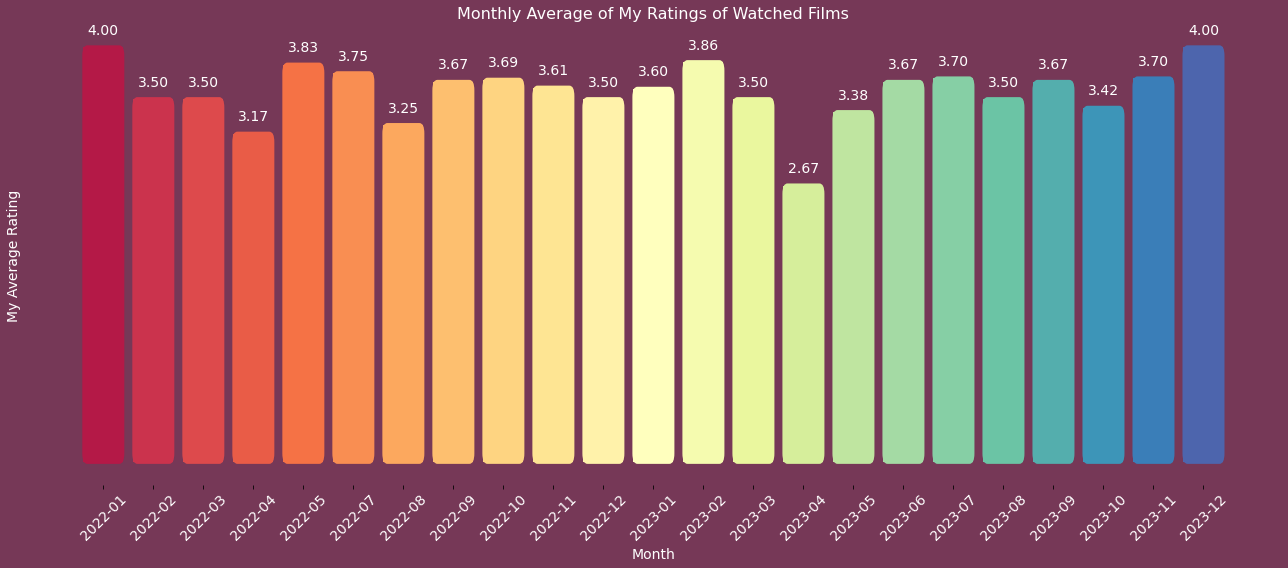

In [5]:
copy = df.copy()

# Convert 'Watched Date' to datetime format
copy['Watched Date'] = pd.to_datetime(copy['Watched Date'])

# Extract the month and year information
copy['Month'] = copy['Watched Date'].dt.to_period('M')

# Calculate the average rating for each month
monthly_avg_rating = copy.groupby('Month')['My Rating'].mean().reset_index()

# Set the size of the figure (width, height)
fig = plt.figure(figsize=(18, 8))

# Set the background color for the entire plot
fig.patch.set_facecolor('#763857')  # Dark background color
ax = plt.axes()
ax.set_facecolor("#763857")
# Set the borders of the chart to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')


# Use Seaborn's 'mako' color palette for a dark-to-light transition
colors = sns.color_palette("Spectral", n_colors=len(monthly_avg_rating))

# Increase the linewidth to make the rounded ends greater
bars = plt.bar(monthly_avg_rating['Month'].astype(str), monthly_avg_rating['My Rating'], edgecolor='white', linewidth=0, color=colors, capstyle='round')

# Add FancyBboxPatch to each bar for rounded corners with increased roundness
for index, (bar, rating) in enumerate(zip(bars, monthly_avg_rating['My Rating'])):
    bbox = FancyBboxPatch((index - 0.4, 0), 0.8, rating, boxstyle="round,pad=0.02, rounding_size=0.1", linewidth=0, edgecolor='white', facecolor=bar.get_facecolor())
    plt.gca().add_patch(bbox)

# Remove the grid
plt.grid(False)

# Remove Y labels
plt.yticks([], color='white')

# Show values above bars
for index, rating in enumerate(monthly_avg_rating['My Rating']):
    plt.text(index, rating + 0.1, f'{rating:.2f}', ha='center', va='bottom', color='white', fontsize=14)  # Set text color to white

# Rotate x-axis labels vertically
plt.xticks(rotation=45, fontsize = 14, color='white')

# Add x, y labels, and title
plt.xlabel('Month', fontsize=14, color='white')
plt.ylabel('My Average Rating', fontsize=14, color='white')
plt.title('Monthly Average of My Ratings of Watched Films', fontsize=16, color='white')

# Remove the borders
plt.box(False)

plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()


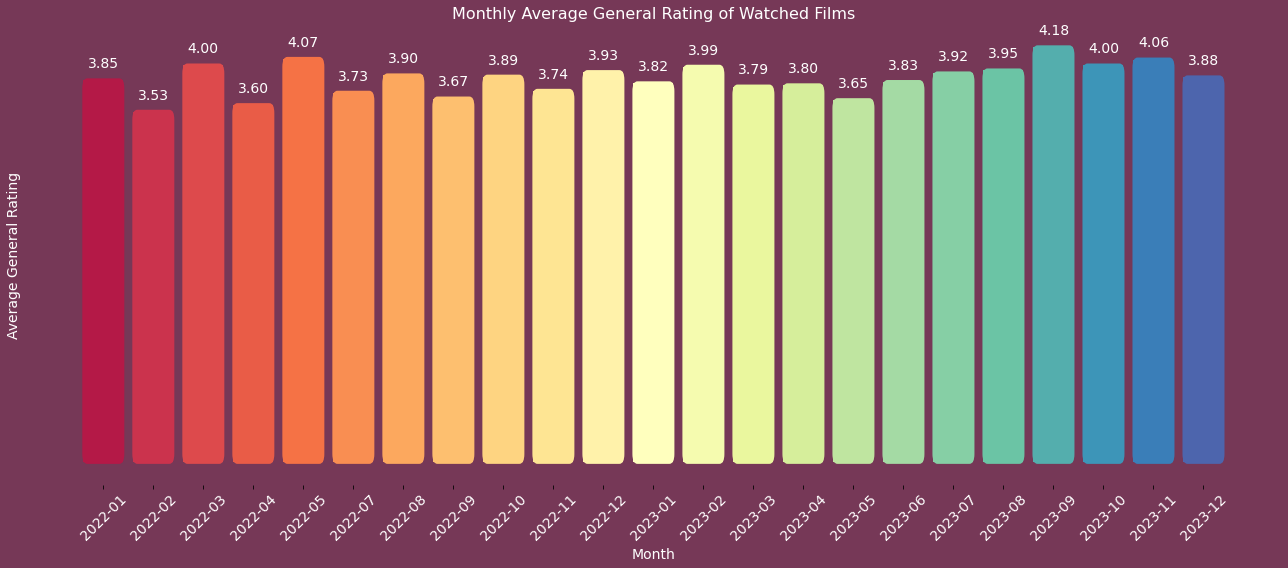

In [6]:
copy = df.copy()

# Convert 'Watched Date' to datetime format
copy['Watched Date'] = pd.to_datetime(copy['Watched Date'])

# Extract the month and year information
copy['Month'] = copy['Watched Date'].dt.to_period('M')

# Convert 'General Rating' to numeric (handle errors by setting them to NaN)
copy['General Rating'] = pd.to_numeric(copy['General Rating'], errors='coerce')

# Drop rows with NaN values in 'General Rating'
copy = copy.dropna(subset=['General Rating'])

# Calculate the average general rating for each month
monthly_avg_general_rating = copy.groupby('Month')['General Rating'].mean().reset_index()

# Set the size of the figure (width, height)
fig = plt.figure(figsize=(18, 8))

# Set the background color for the entire plot
fig.patch.set_facecolor('#763857')  # Dark background color
ax = plt.axes()
ax.set_facecolor("#763857")
# Set the borders of the chart to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Use Seaborn's 'mako' color palette for a dark-to-light transition
colors = sns.color_palette("Spectral", n_colors=len(monthly_avg_general_rating))

# Increase the linewidth to make the rounded ends greater
bars = plt.bar(monthly_avg_general_rating['Month'].astype(str), monthly_avg_general_rating['General Rating'], edgecolor='white', linewidth=0, color=colors, capstyle='round')

# Add FancyBboxPatch to each bar for rounded corners with increased roundness
for index, (bar, rating) in enumerate(zip(bars, monthly_avg_general_rating['General Rating'])):
    bbox = FancyBboxPatch((index - 0.4, 0), 0.8, rating, boxstyle="round,pad=0.02, rounding_size=0.1", linewidth=0, edgecolor='white', facecolor=bar.get_facecolor())
    plt.gca().add_patch(bbox)

# Remove the grid
plt.grid(False)

# Remove Y labels
plt.yticks([])

# Show values above bars
for index, rating in enumerate(monthly_avg_general_rating['General Rating']):
    plt.text(index, rating + 0.1, f'{rating:.2f}', ha='center', va='bottom', color='white', fontsize=14)  # Set text color to white

# Rotate x-axis labels vertically
plt.xticks(rotation=45, fontsize=14, color='white')

# Add x, y labels, and title
plt.xlabel('Month', fontsize=14, color='white')
plt.ylabel('Average General Rating', fontsize=14, color='white')
plt.title('Monthly Average General Rating of Watched Films', fontsize=16, color='white')

# Remove the borders
plt.box(False)

plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()


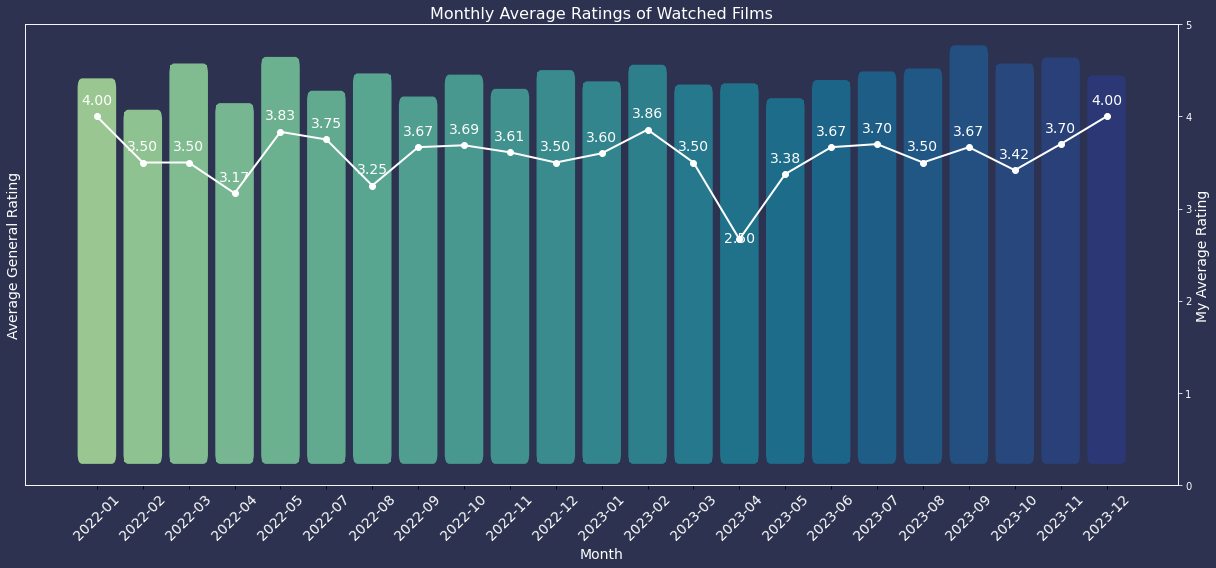

In [7]:
copy = df.copy()

# Convert 'Watched Date' to datetime format
copy['Watched Date'] = pd.to_datetime(copy['Watched Date'])

# Extract the month and year information
copy['Month'] = copy['Watched Date'].dt.to_period('M')

# Convert 'General Rating' to numeric (handle errors by setting them to NaN)
copy['General Rating'] = pd.to_numeric(copy['General Rating'], errors='coerce')

# Drop rows with NaN values in 'General Rating'
copy = copy.dropna(subset=['General Rating'])

# Calculate the average general rating for each month
monthly_avg_general_rating = copy.groupby('Month')['General Rating'].mean().reset_index()

# Set the size of the figure (width, height)
fig, ax1 = plt.subplots(figsize=(17, 8))

# Set the background color for the entire plot
fig.patch.set_facecolor('#2D3250')  # Dark background color
ax1.set_facecolor("#2D3250")
# Set the borders of the chart to white
ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.spines['left'].set_color('white')

# Use Seaborn's 'mako' color palette for a dark-to-light transition
colors = sns.color_palette("crest", n_colors=len(monthly_avg_general_rating))

# Bar chart for General Rating
bars = ax1.bar(monthly_avg_general_rating['Month'].astype(str), monthly_avg_general_rating['General Rating'], edgecolor='white', linewidth=0, color=colors, capstyle='round')

# Add FancyBboxPatch to each bar for rounded corners with increased roundness
for index, (bar, rating) in enumerate(zip(bars, monthly_avg_general_rating['General Rating'])):
    bbox = FancyBboxPatch((index - 0.4, 0), 0.8, rating, boxstyle="round,pad=0.02, rounding_size=0.1", linewidth=0, edgecolor='white', facecolor=bar.get_facecolor())
    ax1.add_patch(bbox)

# Line chart for My Rating
ax2 = ax1.twinx()  # Create a secondary y-axis
line = ax2.plot(monthly_avg_general_rating['Month'].astype(str), df.groupby('Month')['My Rating'].mean().values, color='white', marker='o', label='My Rating', linewidth=2)
ax2.set_ylim(0, max(copy.groupby('Month')['My Rating'].mean().values) + 1)

# Show values above line
for index, rating in enumerate(copy.groupby('Month')['My Rating'].mean().values):
    ax2.text(index, rating + 0.1, f'{rating:.2f}', ha='center', va='bottom', color='white', fontsize=14)  # Set text color to orange

# Remove the grid
ax1.grid(False)
ax2.grid(False)
# Set the borders of the chart to white
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')

# Remove Y labels for the bar chart
ax1.set_yticks([])

# Rotate x-axis labels vertically
ax1.set_xticklabels(monthly_avg_general_rating['Month'].astype(str), rotation=45, fontsize=14, color='white')

# Set y tick labels to white for both axes
ax1.tick_params(axis='y', colors='white')
ax2.tick_params(axis='y', colors='white')

# Add x, y labels, and title
ax1.set_xlabel('Month', fontsize=14, color='white')
ax1.set_ylabel('Average General Rating', fontsize=14, color='white')
ax2.set_ylabel('My Average Rating', fontsize=14, color='white')
plt.title('Monthly Average Ratings of Watched Films', fontsize=16, color='white')

plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()


In [8]:
# Print monthly average values of 'My Rating' and 'General Rating'
for index, (month, my_rating, general_rating) in enumerate(zip(monthly_avg_general_rating['Month'], df.groupby('Month')['My Rating'].mean(), monthly_avg_general_rating['General Rating'])):
    print(f"Month {index + 1}: My Rating = {my_rating:.2f}, General Rating = {general_rating:.2f}")

Month 1: My Rating = 4.00, General Rating = 3.85
Month 2: My Rating = 3.50, General Rating = 3.53
Month 3: My Rating = 3.50, General Rating = 4.00
Month 4: My Rating = 3.17, General Rating = 3.60
Month 5: My Rating = 3.83, General Rating = 4.07
Month 6: My Rating = 3.75, General Rating = 3.73
Month 7: My Rating = 3.25, General Rating = 3.90
Month 8: My Rating = 3.67, General Rating = 3.67
Month 9: My Rating = 3.69, General Rating = 3.89
Month 10: My Rating = 3.61, General Rating = 3.74
Month 11: My Rating = 3.50, General Rating = 3.93
Month 12: My Rating = 3.60, General Rating = 3.82
Month 13: My Rating = 3.86, General Rating = 3.99
Month 14: My Rating = 3.50, General Rating = 3.79
Month 15: My Rating = 2.67, General Rating = 3.80
Month 16: My Rating = 3.38, General Rating = 3.65
Month 17: My Rating = 3.67, General Rating = 3.83
Month 18: My Rating = 3.70, General Rating = 3.92
Month 19: My Rating = 3.50, General Rating = 3.95
Month 20: My Rating = 3.67, General Rating = 4.18
Month 21:

In [9]:
copy = df.copy()

# Convert the 'My Rating' and 'General Rating' columns to numeric
copy['My Rating'] = pd.to_numeric(copy['My Rating'], errors='coerce')
copy['General Rating'] = pd.to_numeric(copy['General Rating'], errors='coerce')

# Group by 'Month' and calculate the mean for 'My Rating' and 'General Rating'
my_ratings_monthly = copy.groupby('Month')['My Rating'].mean()
general_ratings_monthly = copy.groupby('Month')['General Rating'].mean()

# Calculate the correlation coefficient
correlation_coefficient = my_ratings_monthly.corr(general_ratings_monthly)

print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.28318259292927217


In [10]:
# Create a scatter chart with Plotly Express
fig = px.scatter(x=df.groupby('Month')['My Rating'].mean(), y=monthly_avg_general_rating['General Rating'], 
                 color=df.groupby('Month')['My Rating'].mean(), size=df.groupby('Month')['My Rating'].mean(),
                 labels={'x': 'Monthly Average of My Ratings', 'y': 'Monthly Average of General Ratings', 'color': 'Monthly Average of My Ratings'},
                 title='Scatter Chart: Monthly Average of My Rating vs. General Rating',
                 color_continuous_scale='Viridis', size_max=8, range_x=[2.5, 4.5], range_y=[2.5, 4.5])  # Adjust size_max as needed

# Customize layout
fig.update_layout(
    paper_bgcolor='#2D3250',  # Dark background color
    plot_bgcolor='#2D3250',  # Dark plot area color
    font=dict(color='#FFFFFF'),  # Light text color
    title=dict(font=dict(color='#FFFFFF')),  # Light title color
    xaxis=dict(gridcolor='#4A4E69'),  # Light grid color
    yaxis=dict(gridcolor='#4A4E69'),  # Light grid color
    width=900,  # Set the width of the figure
    height=600  # Set the height of the figure
)

# Show the plot
fig.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_18504\3414265315.py:29: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\ACER\AppData\Local\Temp\ipykernel_18504\3414265315.py:29: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



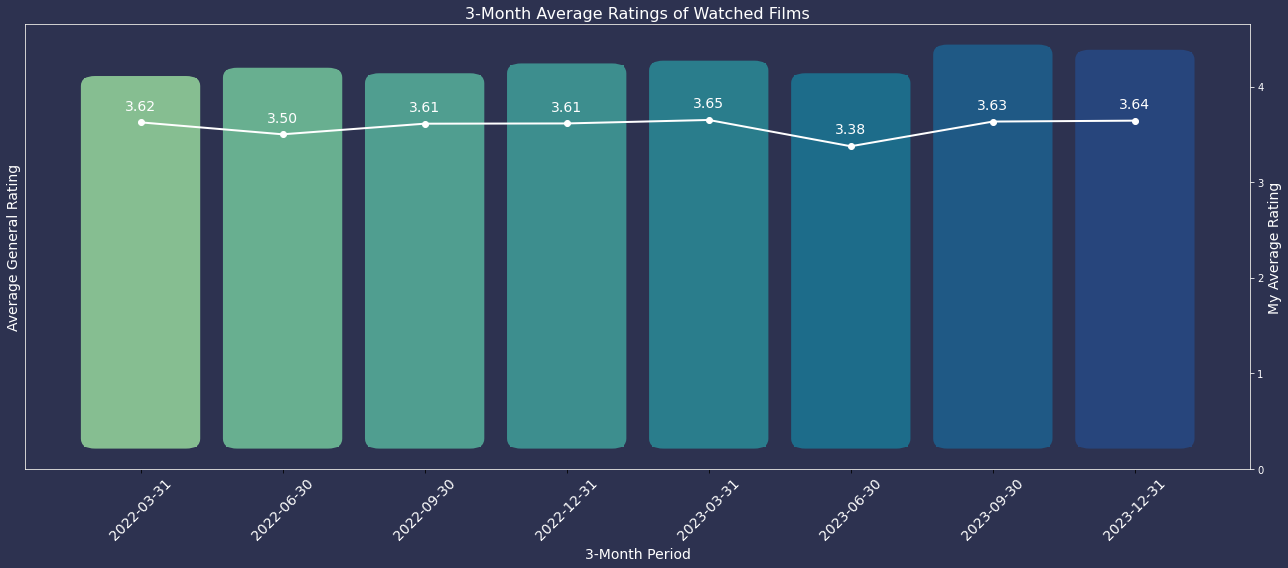

In [11]:
# Convert 'Watched Date' to datetime format
df['Watched Date'] = pd.to_datetime(df['Watched Date'])

# Create a copy of the DataFrame
copy = df.copy()

# Convert 'General Rating' to numeric (handle errors by setting them to NaN)
copy['General Rating'] = pd.to_numeric(copy['General Rating'], errors='coerce')

# Drop rows with NaN values in 'General Rating'
copy = copy.dropna(subset=['General Rating'])

# Set the 'Watched Date' column as the index
copy = copy.set_index('Watched Date')

# Define the 3-month periods
periods = [
    ('2022-01-01', '2022-03-31'),
    ('2022-04-01', '2022-06-30'),
    ('2022-07-01', '2022-09-30'),
    ('2022-10-01', '2022-12-31'),
    ('2023-01-01', '2023-03-31'),
    ('2023-04-01', '2023-06-30'),
    ('2023-07-01', '2023-09-30'),
    ('2023-10-01', '2023-12-31'),
]

# Filter the DataFrame for each period and calculate the mean
period_means = [copy[start:end].mean() for start, end in periods]

# Create a new DataFrame with the means and period labels
resampled_df = pd.DataFrame(period_means, index=pd.to_datetime([end for _, end in periods]))

# Set the size of the figure (width, height)
fig, ax1 = plt.subplots(figsize=(18, 8))

# Set the background color for the entire plot
fig.patch.set_facecolor('#2D3250')  # Dark background color
ax1.set_facecolor("#2D3250")
# Set the borders of the chart to white
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')

# Use Seaborn's 'mako' color palette for a dark-to-light transition
colors = sns.color_palette("crest", n_colors=len(resampled_df))

# Bar chart for General Rating (3 months)
bars = ax1.bar(resampled_df.index.astype(str), resampled_df['General Rating'], edgecolor='white', linewidth=0, color=colors, capstyle='round')

# Add FancyBboxPatch to each bar for rounded corners with increased roundness
for index, (bar, rating) in enumerate(zip(bars, resampled_df['General Rating'])):
    bbox = FancyBboxPatch((index - 0.4, 0), 0.8, rating, boxstyle="round,pad=0.02, rounding_size=0.1", linewidth=0, edgecolor='white', facecolor=bar.get_facecolor())
    ax1.add_patch(bbox)

# Line chart for My Rating (3 months)
ax2 = ax1.twinx()  # Create a secondary y-axis
line = ax2.plot(resampled_df.index.astype(str), resampled_df['My Rating'], color='white', marker='o', label='My Rating (3 months)', linewidth=2)
ax2.set_ylim(0, max(resampled_df['My Rating']) + 1)

# Show values above line
for index, rating in enumerate(resampled_df['My Rating']):
    ax2.text(index, rating + 0.1, f'{rating:.2f}', ha='center', va='bottom', color='white', fontsize=14)  # Set text color to white

ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')

# Remove the grid
ax1.grid(False)
ax2.grid(False)

# Remove Y labels for the bar chart
ax1.set_yticks([])

# Rotate x-axis labels vertically
ax1.set_xticklabels(resampled_df.index.astype(str), rotation=45, fontsize=14, color='white')

# Set y tick labels to white for both axes
ax1.tick_params(axis='y', colors='white')
ax2.tick_params(axis='y', colors='white')

# Add x, y labels, and title
ax1.set_xlabel('3-Month Period', fontsize=14, color='white')
ax1.set_ylabel('Average General Rating', fontsize=14, color='white')
ax2.set_ylabel('My Average Rating', fontsize=14, color='white')
plt.title('3-Month Average Ratings of Watched Films', fontsize=16, color='white')

plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_18504\1123579844.py:25: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\ACER\AppData\Local\Temp\ipykernel_18504\1123579844.py:25: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



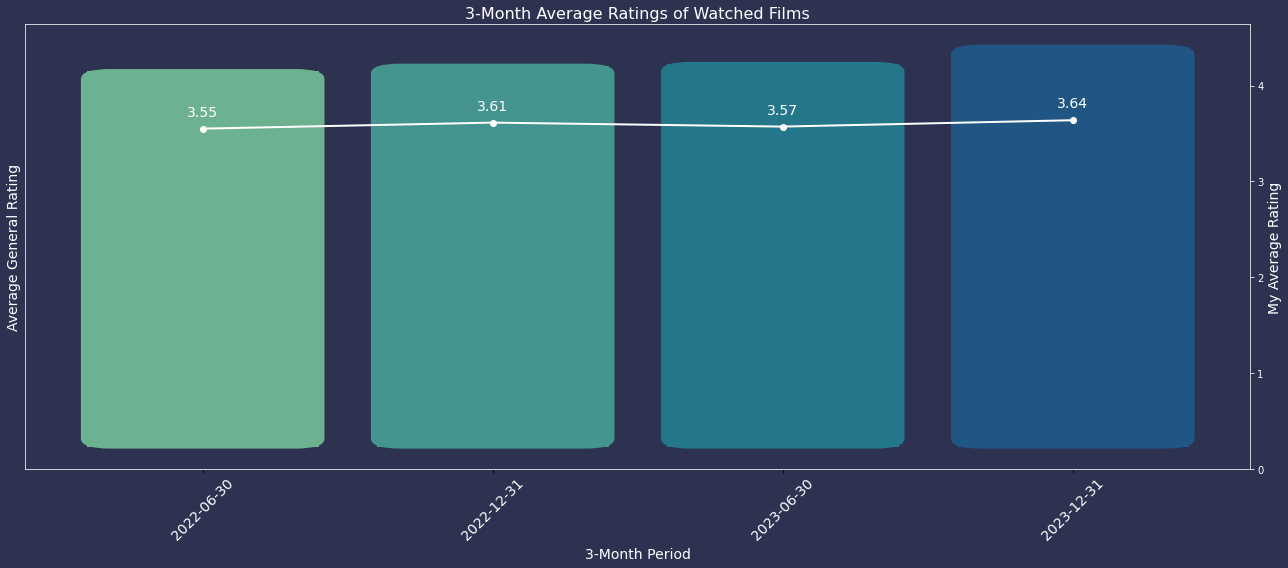

In [12]:
# Convert 'Watched Date' to datetime format
df['Watched Date'] = pd.to_datetime(df['Watched Date'])

# Create a copy of the DataFrame
copy = df.copy()

# Convert 'General Rating' to numeric (handle errors by setting them to NaN)
copy['General Rating'] = pd.to_numeric(copy['General Rating'], errors='coerce')

# Drop rows with NaN values in 'General Rating'
copy = copy.dropna(subset=['General Rating'])

# Set the 'Watched Date' column as the index
copy = copy.set_index('Watched Date')

# Define the 3-month periods
periods = [
    ('2022-01-01', '2022-06-30'),
    ('2022-07-01', '2022-12-31'),
    ('2023-01-01', '2023-06-30'),
    ('2023-07-01', '2023-12-31'),
]

# Filter the DataFrame for each period and calculate the mean
period_means = [copy[start:end].mean() for start, end in periods]

# Create a new DataFrame with the means and period labels
resampled_df = pd.DataFrame(period_means, index=pd.to_datetime([end for _, end in periods]))

# Set the size of the figure (width, height)
fig, ax1 = plt.subplots(figsize=(18, 8))

# Set the background color for the entire plot
fig.patch.set_facecolor('#2D3250')  # Dark background color
ax1.set_facecolor("#2D3250")
# Set the borders of the chart to white
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')

# Use Seaborn's 'mako' color palette for a dark-to-light transition
colors = sns.color_palette("crest", n_colors=len(resampled_df))

# Bar chart for General Rating (3 months)
bars = ax1.bar(resampled_df.index.astype(str), resampled_df['General Rating'], edgecolor='white', linewidth=0, color=colors, capstyle='round')

# Add FancyBboxPatch to each bar for rounded corners with increased roundness
for index, (bar, rating) in enumerate(zip(bars, resampled_df['General Rating'])):
    bbox = FancyBboxPatch((index - 0.4, 0), 0.8, rating, boxstyle="round,pad=0.02, rounding_size=0.1", linewidth=0, edgecolor='white', facecolor=bar.get_facecolor())
    ax1.add_patch(bbox)

# Line chart for My Rating (3 months)
ax2 = ax1.twinx()  # Create a secondary y-axis
line = ax2.plot(resampled_df.index.astype(str), resampled_df['My Rating'], color='white', marker='o', label='My Rating (3 months)', linewidth=2)
ax2.set_ylim(0, max(resampled_df['My Rating']) + 1)

# Show values above line
for index, rating in enumerate(resampled_df['My Rating']):
    ax2.text(index, rating + 0.1, f'{rating:.2f}', ha='center', va='bottom', color='white', fontsize=14)  # Set text color to white

ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')

# Remove the grid
ax1.grid(False)
ax2.grid(False)

# Remove Y labels for the bar chart
ax1.set_yticks([])

# Rotate x-axis labels vertically
ax1.set_xticklabels(resampled_df.index.astype(str), rotation=45, fontsize=14, color='white')

# Set y tick labels to white for both axes
ax1.tick_params(axis='y', colors='white')
ax2.tick_params(axis='y', colors='white')

# Add x, y labels, and title
ax1.set_xlabel('3-Month Period', fontsize=14, color='white')
ax1.set_ylabel('Average General Rating', fontsize=14, color='white')
ax2.set_ylabel('My Average Rating', fontsize=14, color='white')
plt.title('3-Month Average Ratings of Watched Films', fontsize=16, color='white')

plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()


In [13]:
# Convert 'General Rating' column to numeric
df['General Rating'] = pd.to_numeric(df['General Rating'], errors='coerce')

# 'Genres' column contains lists, convert them to strings
df['Genres'] = df['Genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Remove square brackets from the 'Genres' column
df['Genres'] = df['Genres'].str.strip('[]')

# Split the genres into separate rows
genre_df = df['Genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')

# Merge the original DataFrame with the genre information
merged_df = pd.merge(df, genre_df, left_index=True, right_index=True)

# Count the occurrences of each genre
genre_counts = merged_df['Genre'].value_counts()

# Apply threshold for genres
threshold = 10
filtered_genres = genre_counts[genre_counts >= threshold].index

# Filter the DataFrame for most-watched genres
most_watched_df = merged_df[merged_df['Genre'].isin(filtered_genres)]

# Calculate the average rating for each most-watched genre
genre_avg_ratings = most_watched_df.groupby('Genre')['General Rating'].mean()

# Display the result
print(genre_avg_ratings)



Genre
'Action'      3.900000
'Comedy'      3.861290
'Crime'       3.863636
'Drama'       3.926471
'Fantasy'     3.781818
'History'     4.040000
'Horror'      3.650000
'Mystery'     3.805882
'Romance'     3.846154
'Thriller'    3.684615
Name: General Rating, dtype: float64


No handles with labels found to put in legend.


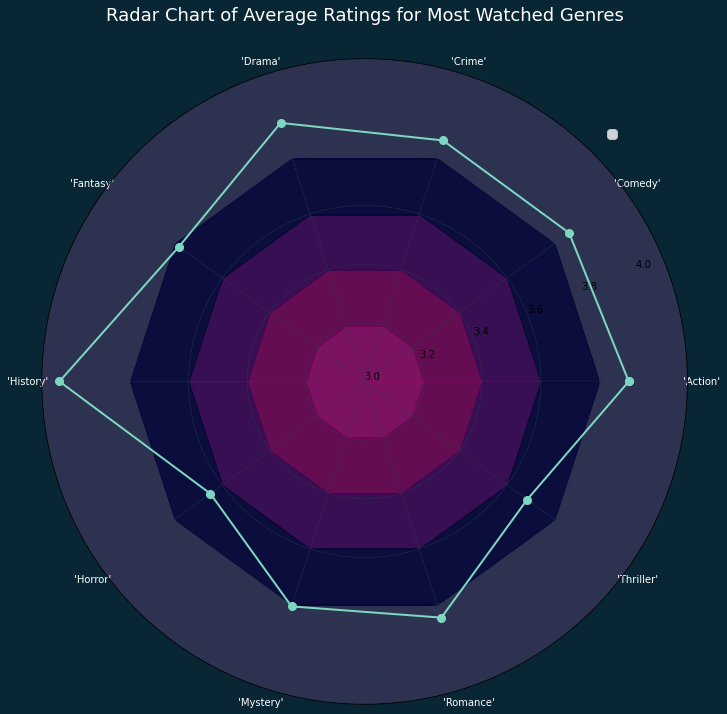

Genre
'Action'      3.900000
'Comedy'      3.861290
'Crime'       3.863636
'Drama'       3.926471
'Fantasy'     3.781818
'History'     4.040000
'Horror'      3.650000
'Mystery'     3.805882
'Romance'     3.846154
'Thriller'    3.684615
Name: General Rating, dtype: float64


In [14]:
# Number of genres
num_genres = len(genre_avg_ratings)

# Create a list of genre names and their corresponding average ratings
genres = genre_avg_ratings.index
ratings = genre_avg_ratings.values

# Calculate angles for each genre
angles = np.linspace(0, 2 * np.pi, num_genres, endpoint=False).tolist()

# Make the plot circular
ratings = np.concatenate((ratings, [ratings[0]]))
angles += angles[:1]

# Create a figure and axis with a dark background
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('#092635')  # Dark background color
ax.set_facecolor('#2D3250')  # Dark background color

# Define color ranges for each layer
color_ranges = ['#910A67', '#720455', '#3C0753', '#030637']

# Plot the radar chart with a color gradient fill for each layer
for i in range(len(color_ranges)):
    lower_limit = 3 + i * 0.2
    upper_limit = lower_limit + 0.2
    ax.fill_between(angles, lower_limit, upper_limit, color=color_ranges[i], alpha=0.8, interpolate=True)

# Add circular markers
ax.plot(angles, ratings, color='#7ED7C1', linewidth=2, linestyle='solid', marker='o', markersize=8, label='_nolegend_')

# Add labels to each point
ax.set_thetagrids(np.degrees(angles[:-1]), genres, color='white')

# Set the y-axis limits to the interval between 3 and 4
ax.set_ylim(3, 4.1)  # Extend the y-axis limit to allow for color gradients beyond the line

# Set the title
ax.set_title('Radar Chart of Average Ratings for Most Watched Genres', fontsize=18, color='white')

# Add a legend with improved placement
ax.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9), fontsize=12)

# Add radial grid lines
ax.grid(color='#2c3e50', linestyle='--', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
print(genre_avg_ratings)

In [15]:
# Create a DataFrame
df_correlation = pd.DataFrame({'filtered_genre_counts': filtered_genre_counts, 'genre_avg_ratings': genre_avg_ratings})

# Calculate the correlation coefficient
correlation_coefficient = df_correlation['filtered_genre_counts'].corr(df_correlation['genre_avg_ratings'])

print(f"Correlation Coefficient: {correlation_coefficient}")

# Create a scatter chart with Plotly
fig = px.scatter(df_correlation, x='genre_avg_ratings', y='filtered_genre_counts', color='genre_avg_ratings', 
                 size='filtered_genre_counts', opacity=0.8, text=df_correlation.index,
                 labels={'genre_avg_ratings': 'Average Ratings', 'filtered_genre_counts': 'Number of Genres Watched'},
                 title='Scatter Chart: Average Ratings vs. Number of Genres Watched',
                 color_continuous_scale='Viridis', size_max=15, range_y = [0,80])

# Customize layout
fig.update_layout(
    paper_bgcolor='#9BB8CD', 
    plot_bgcolor='#9BB8CD',  
    font=dict(color='#495057'),  # Dark text color
    title=dict(font=dict(color='#343A40')),  # Dark title color
    xaxis=dict(gridcolor='#CED4DA', showgrid=False),  # Light grid color
    yaxis=dict(gridcolor='#CED4DA'),  # Light grid color
    width=900,  # Set the width of the figure
    height=600  # Set the height of the figure
)

# Show the plot
fig.show()


Correlation Coefficient: 0.12997306198833244


In [16]:
copy = df.copy()

# Convert 'My Rating' and 'General Rating' to numeric
copy['My Rating'] = pd.to_numeric(copy['My Rating'], errors='coerce')
copy['General Rating'] = pd.to_numeric(copy['General Rating'], errors='coerce')

# Group by 'My Rating' and calculate the mean of 'General Rating'
mean_general_ratings = df.groupby('My Rating')['General Rating'].mean()

# Print the result
print(mean_general_ratings)


My Rating
2.5    3.680000
3.0    3.635294
3.5    3.836842
4.0    4.006667
4.5    4.314286
5.0    4.200000
Name: General Rating, dtype: float64


In [17]:
# Create a scatter chart with Plotly
fig = px.scatter(mean_general_ratings.reset_index(), x='My Rating', y='General Rating', 
                 color='General Rating', size='General Rating', opacity=0.8, text='My Rating',
                 labels={'General Rating': 'Mean General Rating', 'My Rating': 'My Rating'},
                 title='Scatter Plot: My Rating vs. Mean of General Ratings   -> Correlation Coefficient: 0.928',
                 color_continuous_scale='Viridis', size_max=15, range_x=[2.4, 5.1], range_y=[3.4, 4.5])


# Add trendline
z = np.polyfit(mean_general_ratings.index, mean_general_ratings, 1)
p = np.poly1d(z)

trendline_trace = go.Scatter(
    x=mean_general_ratings.index,
    y=p(mean_general_ratings.index),
    mode='lines',
    line=dict(dash='dash', color='#B06161')

)

fig.add_trace(trendline_trace)

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(mean_general_ratings.index, mean_general_ratings)[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

# Extract the slope from the polynomial fit coefficients
slope = z[0]
# Print the slope
print("Slope of the trendline:", slope)

# Customize layout
fig.update_layout(
    paper_bgcolor='#9BB8CD', 
    plot_bgcolor='#9BB8CD',  
    font=dict(color='#495057'),  # Dark text color
    title=dict(font=dict(color='#343A40')),  # Dark title color
    xaxis=dict(gridcolor='#CED4DA', showgrid=True, zeroline=False),  # Light grid color
    yaxis=dict(gridcolor='#CED4DA', showgrid=True, zeroline=False),  # Light grid color
    width=900,  # Set the width of the figure
    height=600  # Set the height of the figure
)

# Show the plot
fig.show()


Correlation Coefficient: 0.928293868453409
Slope of the trendline: 0.2746742486468271


In [18]:
# List of periods
periods = [
    ('2022-01-01', '2022-03-31'),
    ('2022-04-01', '2022-06-30'),
    ('2022-07-01', '2022-09-30'),
    ('2022-10-01', '2022-12-31'),
    ('2023-01-01', '2023-03-31'),
    ('2023-04-01', '2023-06-30'),
    ('2023-07-01', '2023-09-30'),
    ('2023-10-01', '2023-12-31'),
]

# Create an empty list to store slopes
slopes = []

# Iterate over the periods
for period in periods:
    start_date = period[0]
    end_date = period[1]
    subset_df = df[(df['Watched Date'] >= start_date) & (df['Watched Date'] <= end_date)]

    # Convert 'My Rating' and 'General Rating' to numeric
    subset_df['My Rating'] = pd.to_numeric(subset_df['My Rating'], errors='coerce')
    subset_df['General Rating'] = pd.to_numeric(subset_df['General Rating'], errors='coerce')

    # Group by 'My Rating' and calculate the mean of 'General Rating'
    mean_general_ratings = subset_df.groupby('My Rating')['General Rating'].mean()

    # Calculate the slope using polyfit
    z = np.polyfit(mean_general_ratings.index, mean_general_ratings, 1)
    slope = z[0]

    # Append the slope to the list
    slopes.append(slope)

# Print the slopes for each period
for period, slope in zip(periods, slopes):
    print(f"Slope for period {period}: {slope}")



C:\Users\ACER\AppData\Local\Temp\ipykernel_18504\234997711.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ACER\AppData\Local\Temp\ipykernel_18504\234997711.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ACER\AppData\Local\Temp\ipykernel_18504\234997711.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Slope for period ('2022-01-01', '2022-03-31'): 0.266666666666667
Slope for period ('2022-04-01', '2022-06-30'): 0.44
Slope for period ('2022-07-01', '2022-09-30'): 0.5149999999999992
Slope for period ('2022-10-01', '2022-12-31'): 0.35277777777777725
Slope for period ('2023-01-01', '2023-03-31'): 0.330833333333333
Slope for period ('2023-04-01', '2023-06-30'): -0.07000000000000065
Slope for period ('2023-07-01', '2023-09-30'): 0.27499999999999936
Slope for period ('2023-10-01', '2023-12-31'): 0.3180952380952383


C:\Users\ACER\AppData\Local\Temp\ipykernel_18504\234997711.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ACER\AppData\Local\Temp\ipykernel_18504\234997711.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ACER\AppData\Local\Temp\ipykernel_18504\234997711.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

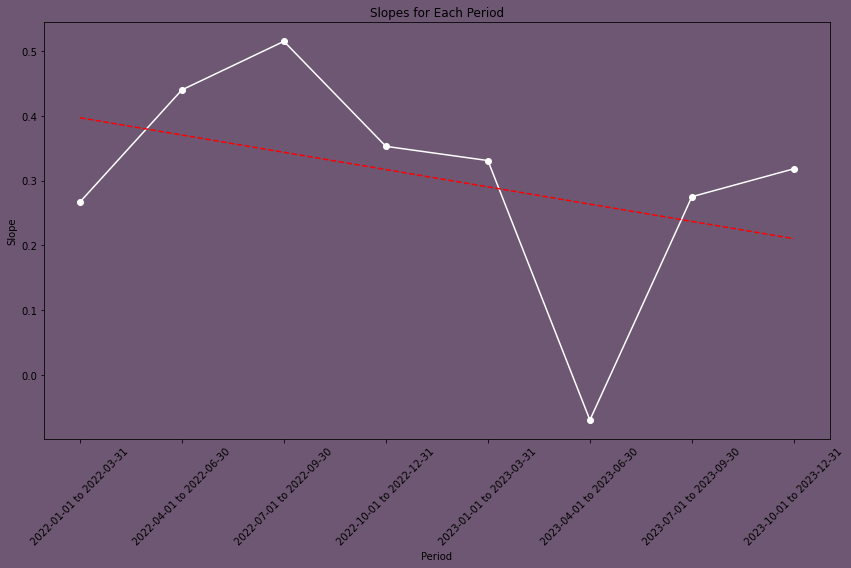

In [19]:

# Plot the slopes
plt.figure(figsize=(12, 8), facecolor='#6E5773')
plt.plot(range(1, len(periods) + 1), slopes, marker='o', linestyle='-', color='w')
plt.xticks(range(1, len(periods) + 1), [f'{start} to {end}' for start, end in periods], rotation=45)
plt.title('Slopes for Each Period')
plt.xlabel('Period')
plt.ylabel('Slope')

# Remove the grid and borders
plt.grid(False)

# Customize the background color
plt.gca().set_facecolor('#6E5773')  # Set your desired background color here

# Add a trendline
z = np.polyfit(range(1, len(periods) + 1), slopes, 1)
p = np.poly1d(z)
plt.plot(range(1, len(periods) + 1), p(range(1, len(periods) + 1)), linestyle='--', color='r', label='Trendline')


plt.tight_layout()
plt.show()

Predicted slope for the current period: 0.18344246031745975


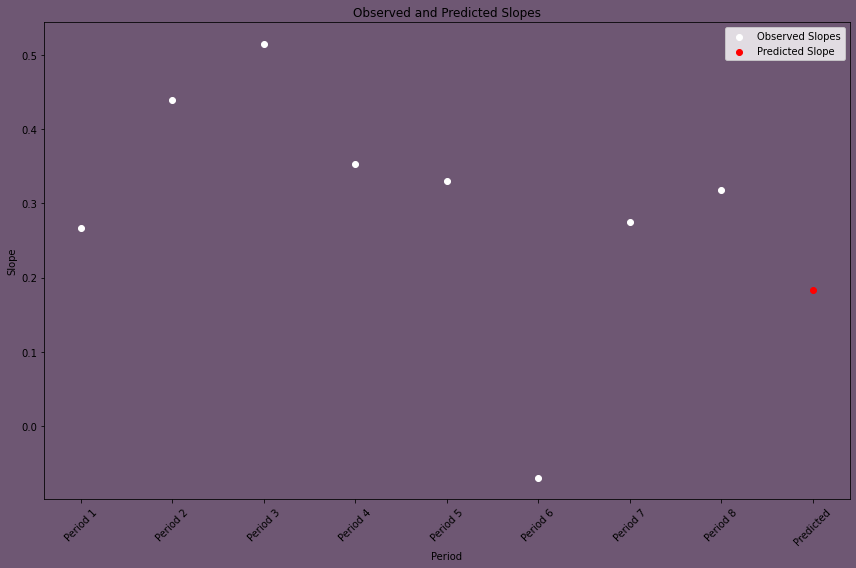

In [20]:
# Create a linear regression model
regression_model = np.poly1d(np.polyfit(range(1, len(periods) + 1), slopes, 1))

# Predict the slope for the current period
current_period_slope = regression_model(len(periods) + 1)

# Print the predicted slope for the current period
print(f"Predicted slope for the current period: {current_period_slope}")

# Visualize the prediction
plt.figure(figsize=(12, 8), facecolor='#6E5773')
plt.scatter(range(1, len(periods) + 1), slopes, color='w', label='Observed Slopes')
plt.scatter(len(periods) + 1, current_period_slope, color='r', label='Predicted Slope')
plt.title('Observed and Predicted Slopes')
plt.xlabel('Period')
plt.ylabel('Slope')
plt.xticks(range(1, len(periods) + 2), [f'Period {i}' for i in range(1, len(periods) + 1)] + ['Predicted'], rotation=45)
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('#6E5773')
plt.tight_layout()
plt.show()


In [21]:
# Convert 'My Rating' and 'General Rating' to numeric
df['My Rating'] = pd.to_numeric(df['My Rating'], errors='coerce')
df['General Rating'] = pd.to_numeric(df['General Rating'], errors='coerce')

# Drop rows with missing values in 'General Rating'
df = df.dropna(subset=['General Rating'])

# Calculate the correlation coefficient
correlation_coefficient = df['My Rating'].corr(df['General Rating'])

print(f"Correlation Coefficient: {correlation_coefficient}")

# Set seaborn style for improved aesthetics
sns.set(style='whitegrid')

# Create a scatter chart with Plotly
fig = px.scatter(df, x='My Rating', y='General Rating', 
                 color='General Rating', opacity=0.8, text='My Rating',
                 labels={'General Rating': 'General Rating', 'My Rating': 'My Rating'},
                 title=f'Scatter Chart: My Ratings vs. General Ratings  -   Correlation Coefficient: {correlation_coefficient:.2f}',
                 color_continuous_scale='Viridis', range_x=[2.4, 5.1], range_y=[2.7, 4.7])

# Customize layout
fig.update_layout(
    paper_bgcolor='#82A0D8', 
    plot_bgcolor='#82A0D8',  
    font=dict(color='black'), 
    title=dict(font=dict(color='black')),  # Dark title color
    xaxis=dict(gridcolor='#CED4DA', showgrid=True, zeroline=False),  # Light grid color
    yaxis=dict(gridcolor='#CED4DA', showgrid=True, zeroline=False),  # Light grid color
    width=900,  # Set the width of the figure
    height=600  # Set the height of the figure
)

# Show the plot
fig.show()


Correlation Coefficient: 0.47792125126423096
